<a href="https://colab.research.google.com/github/FelipeFerAl/SignalsTheory/blob/main/TareaEstimaci%C3%B3n2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias y Señal Original

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
#Frecuencia angular general y vector de tiempo
w = 2*np.pi
T = 3
N = 1024
fs = N/T
t = np.linspace(0,T,N)

#Señales particulares
x1 = np.cos(w*t)
x2 = 1/3*(np.sin(3*w*t))
x3 = 1/5*(np.sin(5*w*t))

#Señal original para la red
xt = x1-x2+x3

#Transformada de la señal original
fr, xt_trans = sig.welch(xt,fs=fs,nperseg=1024)

<ipython-input-3-a4a7057724ae>:6: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(10**-9,0)


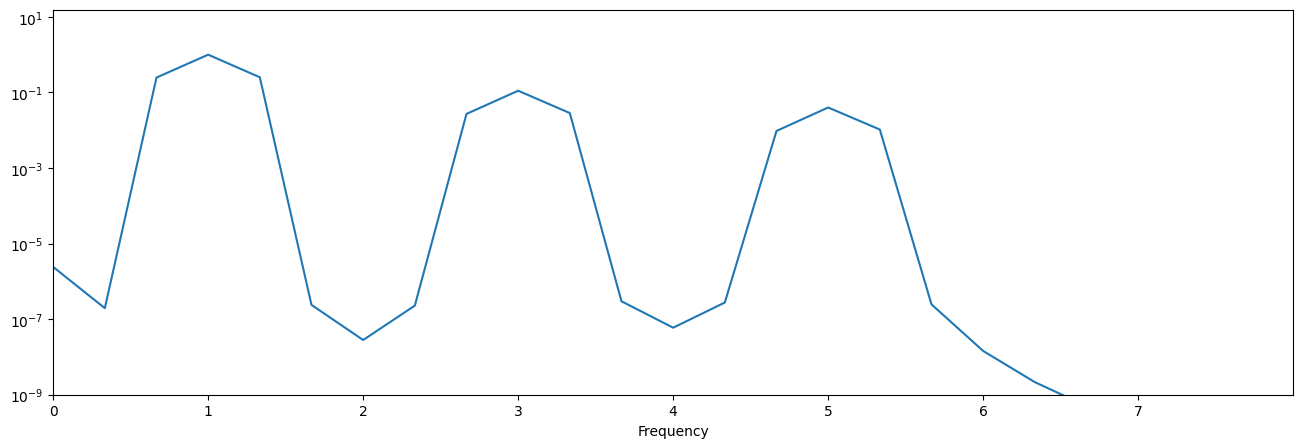

In [ ]:
plt.figure(figsize=(16,5))
plt.semilogy(fr,xt_trans)
plt.xlabel('Frequency')
plt.xlim(0,8)
plt.xticks(np.arange(0,8,1))
plt.ylim(10**-9,0)
plt.show()

# Función generadora de ruido
En base a esta función podremos crear señales aleatorias con diferentes niveles de ruido

In [ ]:
def noise(ruido, mean=0, size=1024,fs=fs):

    noise = np.random.normal(mean, ruido, size)
    noisy_signal = xt + noise
    return noisy_signal

# Generación de la matriz de entrada y salida
Generamos la matriz de entrada con la función de ruido, luego transformamos esta misma matriz con el método de Welch y obtenemos la matriz que funcionará como la salida de mi modelo

In [ ]:
# Ruido inicial para la Matriz de entrada 'M_ruido'
ruido_3 = []
ruido_5 = []
ruido_10 = []
for i in range(0,330,1):
  ruido_3.append(noise(3))
  ruido_5.append(noise(5))
  ruido_10.append(noise(10))
M_ruido = np.vstack((ruido_3,ruido_5,ruido_10))

# Transformación del ruido para la salida 'PSD'
PSD_3 = []
PSD_5 = []
PSD_10 = []
for i in range(0,330,1):
  PSD_3.append(sig.welch(ruido_3[i],fs=fs,nperseg=1024)[1])
  PSD_5.append(sig.welch(ruido_5[i],fs=fs,nperseg=1024)[1])
  PSD_10.append(sig.welch(ruido_10[i],fs=fs,nperseg=1024)[1])
PSD = np.vstack((PSD_3,PSD_5,PSD_10))

# Preparación de los datos para la Red
Separamos nuestros datos para entrenamiento y testeo, escalamos los mismos para mejorar el trabajo de la Red

In [ ]:
#Separación de datos
x_train, x_test, y_train, y_test = train_test_split(M_ruido, PSD, test_size=0.3, random_state=42)

#Funciones de escalamiento separados en entradas y salidas
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

#Escalado de las entradas
x_train = scaler_x.fit_transform(x_train)
y_train = scaler_y.fit_transform(y_train)

#Escalado de las salidas
x_test = scaler_x.transform(x_test)
y_test = scaler_y.transform(y_test)

# Definición del modelo

In [ ]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(1024,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(513,activation='linear'))

opt = Adam(learning_rate=0.0001)

model.compile(optimizer=opt,loss='mse',metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=15,validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.0000e+00 - loss: 0.0366 - val_accuracy: 0.0000e+00 - val_loss: 0.0191
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 4.9920e-04 - loss: 0.0184 - val_accuracy: 0.0000e+00 - val_loss: 0.0165
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0018 - loss: 0.0173 - val_accuracy: 0.0576 - val_loss: 0.0151
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.1790 - loss: 0.0155 - val_accuracy: 0.3237 - val_loss: 0.0143
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3141 - loss: 0.0144 - val_accuracy: 0.3669 - val_loss: 0.0136
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3671 - loss: 0.0137 - val_accuracy: 0.3813 - val_loss: 0.0131
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3679 - loss: 0.0129 - val_accuracy: 0.3813 - val_loss: 0.0125
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3521 - loss: 0.0129 - val_accu

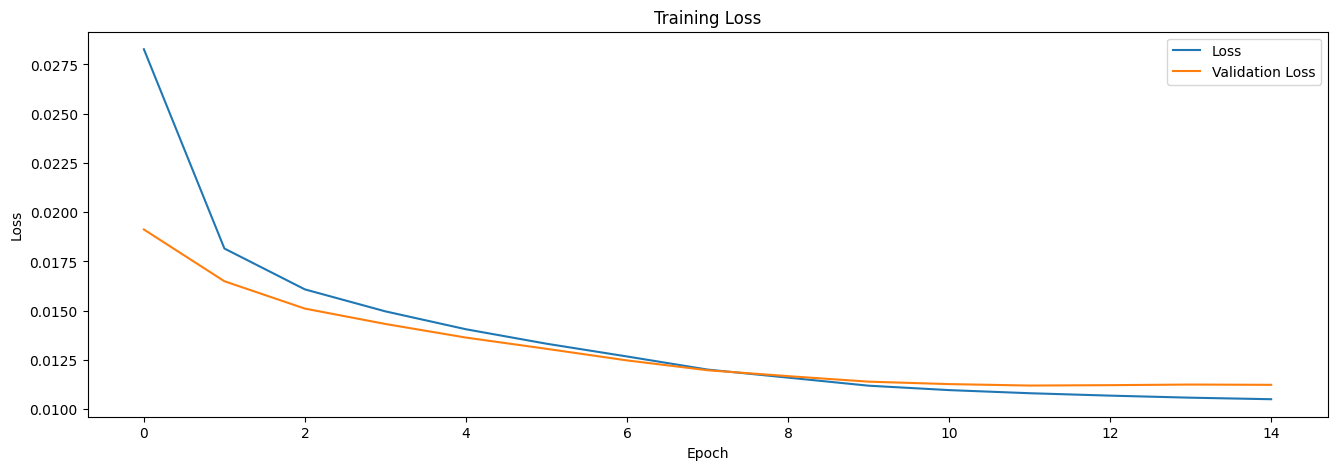

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

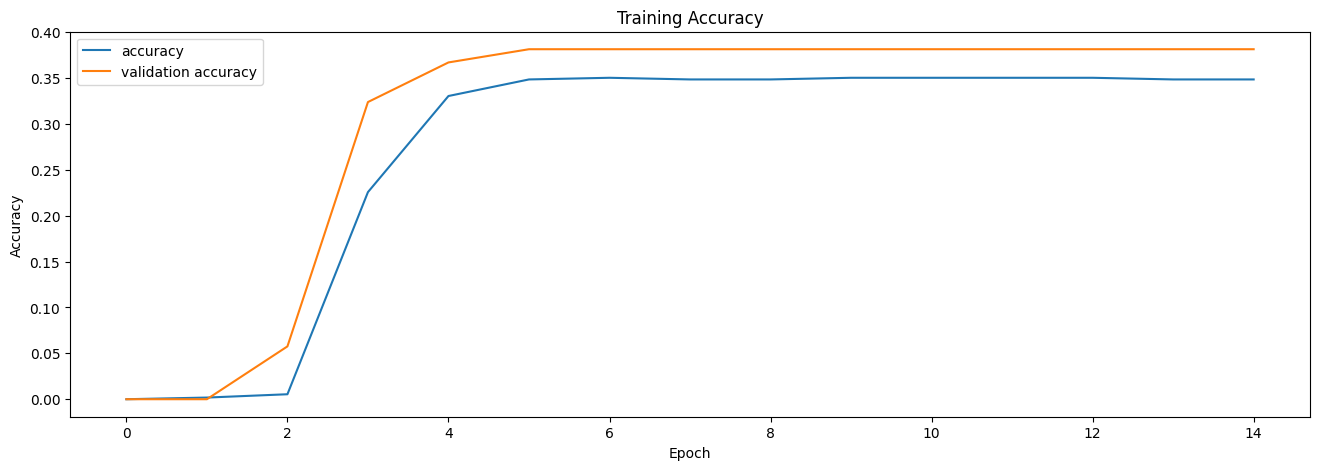

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

In [ ]:
model.evaluate(x_test,y_test)

y = model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3602 - loss: 0.0127
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
y2 = scaler_y.inverse_transform(y)
y_test2 = scaler_y.inverse_transform(y_test)

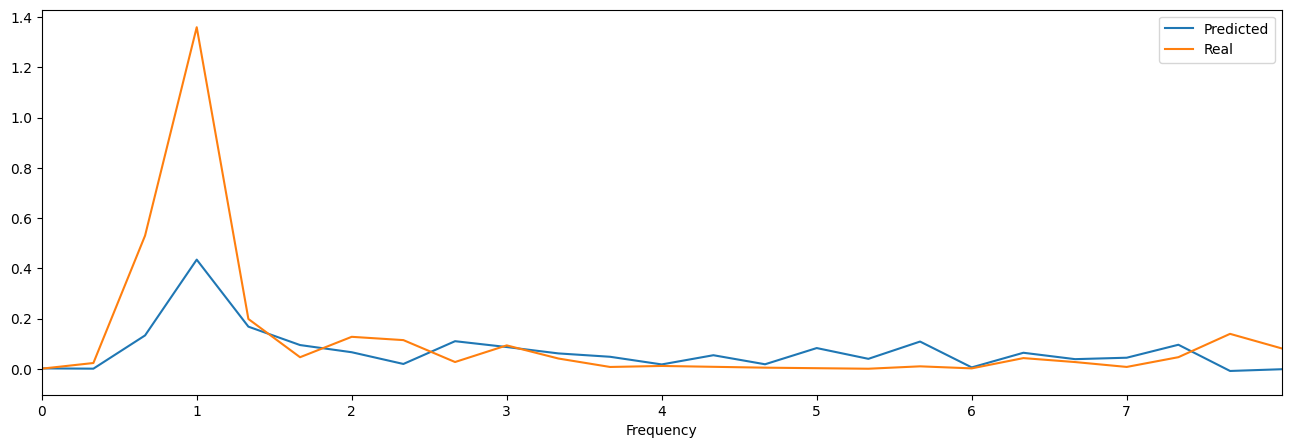

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(fr,y2[200],label='Predicted')
plt.plot(fr,y_test2[200],label='Real')
plt.xlabel('Frequency')
plt.xlim(0,8)
plt.xticks(np.arange(0,8,1))
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 513)                 │         263,169 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,939,845 (15.03 MB)

 Trainable params: 1,313,281 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,626,564 (10.02 MB)

#Explicaciones

En base al model.summary(), mi modelo cuenta con 3 capas densas. Esta configuración se da después de muchos ensayos para conseguir la mayor precisión posible; en la primera capa se cuentan con 256 neuronas con la especificación de que la entrada es de 1024 muestras en el tiempo, la segunda de 512 muestras es una capa oculta de procesamiento de datos, y la final de 513 (que son la cantidad de muestras en frecuencia que necesitamos para nuestras señales) se encarga de realizar la salida de los datos de PSD.

Para los métodos de activación: las primeras 2 capas utilizan una bastante general, "ReLu", ayuda a la eficacia del modelo y a reducir la carga computacional; la última capa es "Linear", ayuda en la predicción de datos continuos, como nuestras señales.

En la sección del optimizador, opto por Adam (Adaptive Moment Estimation), tiene ventajas para la adaptabilidad de un modelo con datos nuevos, y cambiamos el radio de aprendizaje a un valor bajo (0.00001) para evitar el sobreajuste y la memorización del modelo lo máximo posible.

En la copilación del modelo especifíco que quiero obtener los valores de "loss" en base al "error cuadrático medio" (MSE) y el de accuracy, para luego realizar las gráficas respectivas para el análisis del modelo.

Por último, en el entrenamiento del modelo, defino 15 épocas ya que la tarea a realizar es "técnicamente" sencillo para la red y no quiero un sobreajuste de datos ni una pérdida de tiempo con un exceso de épocas.

La validación se tomó en un 20% en base a la solicitud dada en clase.

# Reconstrucciones y filtro

In [ ]:
def reconstruct_signal(psd, N):
    # Asegurarse de que el PSD tenga la longitud correcta
    if len(psd) < N // 2 + 1:
        psd = np.pad(psd, (0, N // 2 + 1 - len(psd)), mode='constant')
    elif len(psd) > N // 2 + 1:
        psd = psd[:N // 2 + 1]

    # Crear el espectro completo (simétrico)
    full_psd = np.concatenate([psd, psd[-2:0:-1]])
    full_psd = np.clip(full_psd, a_min=0, a_max=None)  # Asegurarse de que no haya valores negativos

    # Convertir PSD a magnitudes
    magnitudes = np.sqrt(full_psd)

    # Generar fases
    # phase_ref = np.angle(xt)
    phases = np.random.uniform(0, 2*np.pi, len(magnitudes))

    # Crear el espectro complejo
    spectrum = magnitudes * np.exp(1j * phases)

    # Realizar la IFFT para obtener la señal en el dominio del tiempo
    reconstructed = np.fft.ifft(spectrum).real

    # Normalizar la señal reconstruida
    reconstructed = reconstructed - np.mean(reconstructed)
    reconstructed = reconstructed / np.std(reconstructed)

    return reconstructed

# Usar la función para reconstruir la señal
reconstructed_signal_real = reconstruct_signal(y2[199], N)

# Normalizar la señal original para una comparación justa
# xt_normalized = (xt - np.mean(xt)) / np.std(xt)

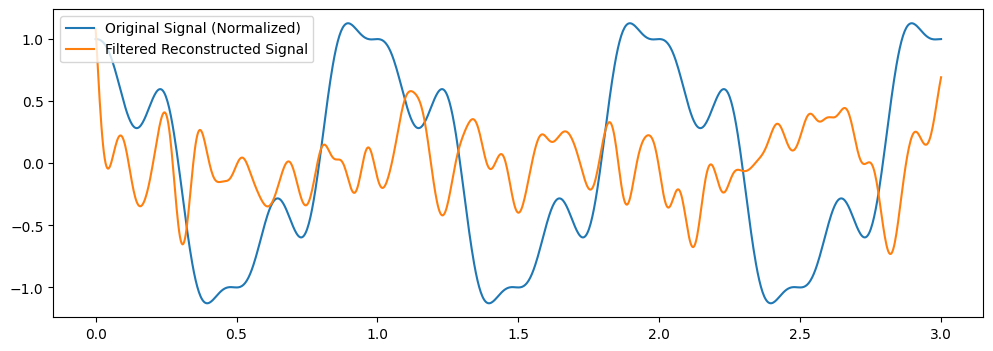

In [ ]:
def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyq = 500
    normal_cutoff = cutoff / nyq  # Normalizar frecuencia de corte
    b, a = sig.butter(order, normal_cutoff, btype='low', analog=False)
    y = sig.filtfilt(b, a, data)
    return y

cutoff_freq = 30  # Frecuencia de corte
reconstructed_signal_real_filtered = butter_lowpass_filter(reconstructed_signal_real, cutoff=cutoff_freq, fs=340)

# Graficar la comparación
plt.figure(figsize=(12, 4))
plt.plot(t, xt, label='Original Signal (Normalized)')
plt.plot(t, reconstructed_signal_real_filtered, label='Filtered Reconstructed Signal')
plt.legend()
plt.show()

# Modelo umbral
El principio de la función plantea que quiero hallar el valor máximo de los 513 puntos que tengo de una de mis señales predichas, guardo este valor para impresión y para la gráfica. Del mismo modo, guardo el valor en ese punto del vector de frecuencia bajo el mismo motivo que el anterior.

Hallando estos valores, para la zona de gráficas, pinto una línea contínua que funciona como límite del umbral (siempre se pinta en base al valor máximo encontrado de la señal tomada, pero un poco por debajo de este punto). También, para mejor visualización, limito ambos ejes a partes con mayor presencia de la señal: En el eje X, al inicio de las frecuencias, ignorando gran parte de la señal llena de ruido; y en el eje Y, en base al valor máximo encontrado para visualizar y denotar la presencia del primer armónico.

In [ ]:
def umbral(signal):
  max_y = 0
  for i in range(0,len(signal)):
    if signal[i] > max_y:
      max_y = signal[i]
      freq = fr[i]
  return max_y, freq

In [ ]:
point = int(input("Ingrese la señal que desea analizar (0-297): "))

max, freq = umbral(y2[point])
print(f"En la frecuencia de {freq} [Hz], se encuentra el máximo punto de potencia de la señal {point} con un valor de {max:.2f} [V**2/Hz]")

Ingrese la señal que desea analizar (0-297): 190
En la frecuencia de 1.0 [Hz], se encuentra el máximo punto de potencia de la señal 190 con un valor de 0.47 [V**2/Hz]


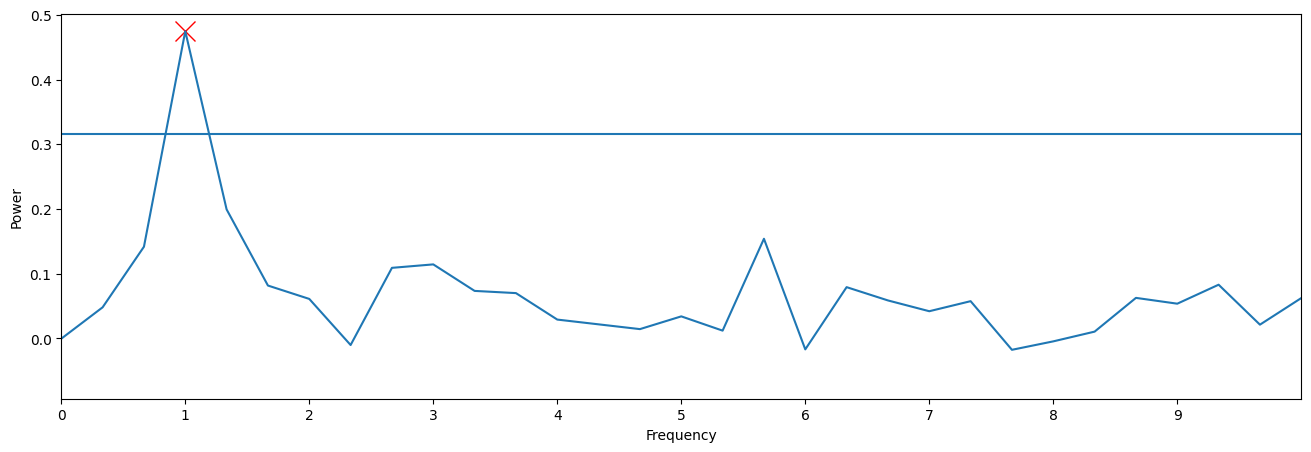

In [ ]:
plt.figure(figsize=(16,5))
plt.axhline(y=max-(1/3*max))
plt.plot(freq,max,marker='x',markersize=15,color='r')
plt.plot(fr,y2[point])
# plt.ylim(max-(0.9*max),max+(0.9*max))
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.xlim(0,10)
plt.xticks(np.arange(0,10,1))
plt.show()